In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

![](https://www.ris-ai.com/static/images/models/handwritten-character-01.jpg)

# Here,we will try to classify English Alphabets as shown above with the help of a powerful Convolutional Neural Network.

# Importing Required Libraries

In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# Reading the Data

In [23]:
data = pd.read_csv("data/digital_letters.csv")

In [24]:
data.head() #displaying head of the .csv file

Unnamed: 0    0    1    2    3    4    5    6    7    8  ...  775  776  \
0           0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1           1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2           2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   777  778  779  780  781  782  783  label  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      A  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0      B  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0      C  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0      D  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0      E  

[5 rows x 786 columns]

# Splitting the Data into Images and Labels

In [20]:
y = data["label"]

# Change the letter string to an integer 
capitalizedAlphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

for index, letter in enumerate(y): 
    data["0"] = capitalizedAlphabet.find(letter)
    
#data.drop("label", axis=1)
#data.to_csv("data/digital_letters_updated.csv", index=False)

y = data["label"]
X = data.drop(["0", "label"],axis = 1) # axis=1 for dropping column

In [6]:
X.head() #Images

Unnamed: 0    1    2    3    4    5    6    7    8    9  ...  774  775  \
0           0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1           1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2           2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3           3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4           4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

   776  777  778  779  780  781  782  783  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 784 columns]

In [7]:
y.head() #Labels

0    A
1    B
2    C
3    D
4    E
Name: label, dtype: object

# Splitting the Data into Train and Test Sets

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# Reshaping the data into the format of Images

In [9]:
X_train = np.reshape(X_train.values, (X_train.shape[0], 28,28))
X_test = np.reshape(X_test.values, (X_test.shape[0], 28,28))

# Encoding English Alphabets to Number from 0-25

In [10]:
encode = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [11]:
# Change the letter string to an integer 
capitalizedAlphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

for index, letter in enumerate(y): 
    y[index] = capitalizedAlphabet.find(letter)

/tmp/ipykernel_17775/4031383641.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[index] = capitalizedAlphabet.find(letter)


# Getting to know about the Number of Alphabets present in the Data

In [12]:
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') #a vector of size 26 with all 0 values
len(y)

13130

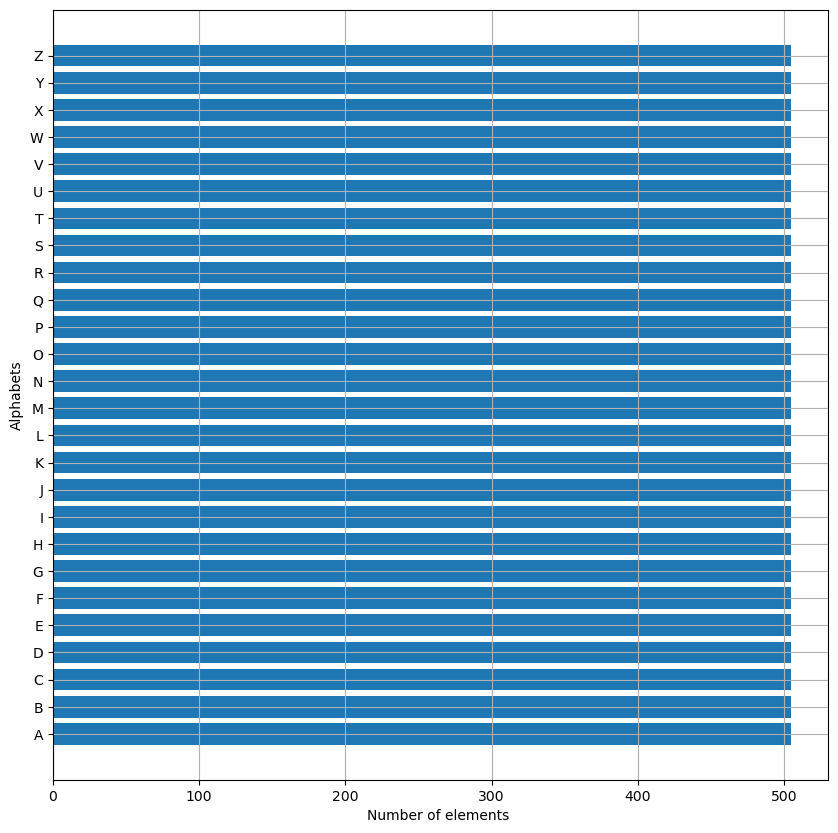

In [13]:
y_int = np.int0(y) 
count = np.zeros(26, dtype='int') #a vector of size 26 with all 0 values
for i in y_int:
    count[i] +=1 #total count of each alphabet

alphabets = []
for i in encode.values():
    alphabets.append(i) #all alphabets

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

# Making the data suitable for the CNN

In [14]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1) #RGB =>Channel of 1
print("New shape of train data: ", X_test.shape)

New shape of train data:  (10504, 28, 28, 1)
New shape of train data:  (2626, 28, 28, 1)


# Converting the Values to Categorical Variables

In [15]:
train_yOHE = to_categorical(Y_train, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(Y_test, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

ValueError: invalid literal for int() with base 10: 'A'

# Creating the CNN

In [ ]:
model = Sequential()
#CNN
# input -> conv -> maxpool -> conv -> maxpool ......->flattened vector-> 
#.                        hidden layer -> hidden layer -> softmax layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))

# Getting Summary of the Model Created

In [ ]:
model.summary()

# Compiling the Model

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Starting the Training

In [ ]:
history = model.fit(X_train, train_yOHE, epochs=1,  validation_data = (X_test,test_yOHE))

# Making Predictions

In [ ]:
predictions = model.predict(
      x=X_test
    , batch_size=30
    , verbose=0
)

In [ ]:
#Rounding-off the predictions to 0s and 1s

rounded_predictions = np.argmax(predictions, axis=-1)

# Creating Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=Y_test, y_pred=rounded_predictions)

In [ ]:
#Labels for the CM

cm_plot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Plotting the Confusion Matrix

In [ ]:
#Plotting the CM

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**SO, ACCORDING TO THE CONFUSION MATRIX, OUR MODEL WORKED PRETTY WELL ON THE TEST DATASET THAT WE CREATED TO TEST IT.**